In [9]:
import pandas as pd, numpy as np
import umap
import seaborn as sns

In [6]:
from transformers import AutoModel, AutoTokenizer
import torch
import matplotlib.pyplot as plt

MODEL_NAME = 'AshtonIsNotHere/GatorTron-OG'

model = AutoModel.from_pretrained(MODEL_NAME)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [2]:
# Regions of the brain
cortex_regions = [
    'Frontal Lobe',
    'Parietal Lobe',
    'Left Temporal Lobe',
    'Right Temporal Lobe',
    'Occipital Lobe',
    'Central Region'
]

# Dictionary describing eeg electrodes
electrodes_descriptions = {
    'EEG FP1': 'Fp1 is an EEG electrode positioned at the frontopolar region of the scalp on the left side. It is commonly used to record electrical brain activity in that specific area. The Fp1 electrode is important for capturing frontal lobe activity, including cognitive processes such as attention, decision-making, and emotional responses. It plays a crucial role in EEG monitoring and can provide valuable insights into brain function.',
    'EEG FP2': 'Fp2 is an EEG electrode placed at the frontopolar region of the scalp on the right side. It is similar to Fp1 in terms of function and purpose. By recording electrical signals from the right frontopolar area, the Fp2 electrode helps monitor activity in the frontal lobe. This electrode can be instrumental in detecting abnormalities or changes in cognitive processing, emotional regulation, and other functions associated with the frontal brain regions.',
    'EEG F3': 'F3 is an EEG electrode positioned on the left side of the scalp, over the frontal lobe. It captures electrical brain activity from the left frontal region and plays a crucial role in monitoring cognitive processes, attention, and motor planning associated with the left hemisphere. The F3 electrode is essential for evaluating frontal lobe abnormalities and can provide valuable insights into conditions such as epilepsy, ADHD, and executive function disorders.',
    'EEG F4': "F4 is an EEG electrode situated on the right side of the scalp, mirroring F3's position. It records electrical signals originating from the right frontal lobe. Similar to F3, the F4 electrode is vital for assessing cognitive functions, attention, and motor planning associated with the right hemisphere. Monitoring the electrical activity in this area is crucial for detecting abnormalities or changes in brain function and can aid in the diagnosis and management of various neurological disorders.",
    'EEG C3': "C3 is an EEG electrode placed on the left side of the scalp, over the central region. It captures electrical brain activity from the left central area, including the sensorimotor cortex. The C3 electrode is important for studying motor control, movement planning, and somatosensory processing associated with the left hemisphere. Monitoring this region can help identify abnormalities or disruptions in motor function and contribute to the evaluation of conditions such as stroke, movement disorders, and brain injuries.",
    'EEG C4': "C4 is an EEG electrode located on the right side of the scalp, corresponding to C3's position. It records electrical signals from the right central region, encompassing the sensorimotor cortex. Similar to C3, the C4 electrode is crucial for monitoring motor control, movement planning, and somatosensory processing associated with the right hemisphere. It plays a significant role in assessing motor function asymmetries and can aid in the diagnosis and treatment of conditions such as Parkinson's disease, motor cortex lesions, and focal seizures.",
    'EEG P3': "P3 is an EEG electrode positioned on the left side of the scalp, above the parietal lobe. It captures electrical brain activity from the left parietal region, which is involved in processes such as spatial awareness, attention, and sensory integration. The P3 electrode is essential for studying visuospatial processing, visual attention, and other functions associated with the left hemisphere's parietal areas. Monitoring this region can provide valuable insights into conditions like neglect syndrome, spatial processing disorders, and attentional deficits.",
    'EEG P4': "P4 is an EEG electrode situated on the right side of the scalp, mirroring P3's position. It records electrical signals from the right parietal lobe. The P4 electrode is instrumental in monitoring visuospatial processing, attention, and sensory integration associated with the right hemisphere's parietal regions. By assessing electrical activity in this area, it can help identify abnormalities or changes in brain function and contribute to the evaluation and management of conditions such as spatial neglect, visual attention disorders, and parietal lobe epilepsy.",
    'EEG O1': "O1 is an EEG electrode positioned on the left side of the scalp, over the occipital lobe. It captures electrical brain activity from the left occipital region, which is primarily responsible for visual processing and perception. The O1 electrode is essential for studying visual evoked potentials, visual attention, and other functions associated with the left hemisphere's occipital areas. Monitoring this region can provide valuable insights into conditions such as visual processing disorders, occipital lobe epilepsy, and visual hallucinations.",
    'EEG O2': "O2 is an EEG electrode situated on the right side of the scalp, corresponding to O1's position. It records electrical signals from the right occipital lobe. Similar to O1, the O2 electrode is vital for monitoring visual processing, visual attention, and perception associated with the right hemisphere's occipital areas. It plays a significant role in assessing visual function asymmetries and can aid in the diagnosis and management of conditions such as visual field defects, occipital seizures, and visual processing impairments.",
    'EEG F7': "F7 is an EEG electrode situated at the left frontotemporal region of the scalp. It captures electrical activity from the left side of the brain, specifically the frontal and temporal lobes. The F7 electrode plays a significant role in assessing brain functions related to language processing, memory, and emotion. It is particularly useful for investigating disorders like epilepsy and monitoring the presence of abnormal electrical patterns in these areas.",
    'EEG F8': "F8 is an EEG electrode positioned at the right frontotemporal region of the scalp. It complements F7 by capturing electrical brain activity from the right frontal and temporal lobes. The F8 electrode helps monitor cognitive functions associated with the right hemisphere, including language processing, memory retrieval, and emotional regulation. It is essential for identifying any asymmetries or abnormalities in these brain regions and can contribute to the diagnosis and treatment of various neurological conditions.",
    'EEG T3': "T3 is an EEG electrode located on the left side of the scalp, above the temporal lobe. It records electrical signals originating from the left temporal region of the brain. The T3 electrode is significant for monitoring auditory processing, language comprehension, and memory functions associated with the left hemisphere. It is commonly used in diagnosing and studying conditions such as temporal lobe epilepsy and language-related disorders.",
    'EEG T4': "T4 is an EEG electrode placed on the right side of the scalp, above the temporal lobe. It complements T3 by recording electrical brain activity from the right temporal region. By monitoring the right hemisphere's functions related to auditory processing, language comprehension, and memory, the T4 electrode assists in assessing brain activity asymmetries and identifying abnormalities in these areas. It is particularly useful in the evaluation of temporal lobe epilepsy and language disorders.",
    'EEG T5': "T5 is an EEG electrode placed on the left side of the scalp, above the temporal lobe, but slightly posterior to T3. It captures electrical brain activity from the left temporal region, particularly the superior and posterior aspects. The T5 electrode is important for studying auditory processing, language comprehension, and memory functions associated with the left hemisphere's superior temporal gyrus. Monitoring this region can provide valuable insights into conditions such as temporal lobe epilepsy, auditory processing disorders, and language impairments.",
    'EEG T6': "T6 is an EEG electrode located on the right side of the scalp, corresponding to T5's position. It records electrical signals from the right temporal region, particularly the superior and posterior aspects of the superior temporal gyrus. Similar to T5, the T6 electrode is crucial for monitoring auditory processing, language comprehension, and memory functions associated with the right hemisphere. It plays a significant role in assessing auditory function asymmetries and can aid in the diagnosis and treatment of conditions such as temporal lobe epilepsy, auditory hallucinations, and language disorders.",
    'EEG FZ': "FZ is an EEG electrode positioned at the midline of the scalp, between F3 and F4. It captures electrical brain activity from the frontal-central region known as the midline prefrontal cortex. The FZ electrode is important for studying cognitive processes, working memory, and attention regulation. Monitoring this midline region can provide valuable insights into executive functions, emotional regulation, and frontal lobe abnormalities. It is particularly useful in the evaluation of conditions such as attention deficit hyperactivity disorder (ADHD), frontal lobe epilepsy, and mood disorders.",
    'EEG CZ': "CZ is an EEG electrode placed at the midline of the scalp, between C3 and C4. It records electrical signals from the central-parietal region, encompassing the sensorimotor and somatosensory cortices. The CZ electrode is crucial for monitoring motor control, sensory integration, and somatosensory processing. It plays a significant role in assessing abnormalities or changes in sensorimotor functions and can contribute to the evaluation and treatment of conditions such as movement disorders, sensory processing disorders, and central seizures.",
    'EEG PZ': "PZ is an EEG electrode positioned at the midline of the scalp, between P3 and P4. It captures electrical brain activity from the parietal-occipital region, which encompasses the parietal lobes and the posterior aspects of the occipital lobes. The PZ electrode plays a crucial role in studying visuospatial processing, attention, and sensory integration in the parietal and occipital regions. It is particularly useful for monitoring visual-spatial cognition, visual attention, and multisensory integration processes. The PZ electrode can provide valuable insights into conditions such as spatial neglect, visuospatial processing disorders, and parietal lobe epilepsy. By monitoring electrical signals from this region, it contributes to the evaluation and understanding of brain activity patterns related to visuospatial perception and attentional processes."
}

# Dictionary describing brain regions
cortex_regions_descriptions = {
    'Frontal Lobe': 'The frontal lobe, located at the front of the brain, is involved in a wide range of higher cognitive functions. It plays a crucial role in executive functions such as decision-making, problem-solving, planning, and reasoning. Additionally, the frontal lobe contributes to motor control, including the initiation and coordination of voluntary movements. It also influences personality, social behavior, emotional regulation, and attentional processes. EEG electrodes associated with the frontal lobe include Fp1, Fp2, F3, F4, F7, F8, and FZ.',
    'Parietal Lobe': 'The parietal lobe, situated near the top and back of the brain, is responsible for various functions related to sensory perception and spatial awareness. It integrates sensory information from different modalities, such as touch, temperature, and proprioception, to create our perception of the surrounding world. The parietal lobe is also involved in spatial cognition, attentional processes, and the coordination of movements. It helps us navigate our environment and manipulate objects in space. EEG electrodes associated with the parietal lobe include P3, P4, PZ, and sometimes T5 and T6.',
    'Left Temporal Lobe': "The left temporal lobe, located on the left side of the brain, is involved in several crucial functions. It plays a critical role in auditory processing, allowing us to perceive and interpret sounds. In particular, the left temporal lobe is involved in language comprehension and production, including the understanding and generation of spoken and written language. It houses important language-related structures, such as Wernicke's area, which contributes to language processing and semantic understanding. Additionally, the left temporal lobe is involved in memory formation, including the encoding and retrieval of verbal and auditory information. EEG electrodes associated with the left temporal lobe include T3, T5, and sometimes P3.",
    'Right Temporal Lobe': "The right temporal lobe, positioned on the right side of the brain, shares several functions with the left temporal lobe. It is involved in auditory processing, including the perception and interpretation of sounds. While the left temporal lobe primarily handles language functions, the right temporal lobe is crucial for the processing of non-verbal auditory information, such as music and environmental sounds. It also contributes to aspects of visual-spatial processing and facial recognition. Additionally, the right temporal lobe plays a role in memory formation, particularly in the retrieval of non-verbal and visuospatial memories. EEG electrodes associated with the right temporal lobe include T4, T6, and sometimes P4.",
    'Occipital Lobe': "The occipital lobe, located at the back of the brain, is primarily dedicated to visual processing. It receives and processes visual information from the eyes, allowing us to perceive and interpret the world around us. The occipital lobe contains specialized regions that process different aspects of vision, such as object recognition, color perception, and motion detection. It helps us form visual representations of the environment and allows us to recognize and identify objects, faces, and visual patterns. EEG electrodes associated with the occipital lobe include O1 and O2.",
    'Central Region': "The central region encompasses the sensorimotor cortex, which is responsible for motor control and somatosensory processing. It plays a critical role in planning and executing voluntary movements. The central region receives sensory information related to touch, pressure, pain, and temperature, providing us with a sense of our body's position, movement, and interaction with the environment. This region is involved in the coordination and modulation of movements, integrating sensory feedback with motor commands to ensure smooth and precise execution of actions. The central region helps us manipulate objects, perform complex motor tasks, and engage in activities requiring fine motor control. EEG electrodes associated with the central region include C3, C4, CZ, and sometimes F3 and F4."
}

# Dictionary mapping brain regions to eeg electrodes
electrodes_regions = {
    'EEG FP1': 'Frontal Lobe',
    'EEG FP2': 'Frontal Lobe',
    'EEG F3': 'Frontal Lobe',
    'EEG F4': 'Frontal Lobe',
    'EEG C3': 'Central Region',
    'EEG C4': 'Central Region',
    'EEG P3': 'Parietal Lobe',
    'EEG P4': 'Parietal Lobe',
    'EEG O1': 'Occipital Lobe',
    'EEG O2': 'Occipital Lobe',
    'EEG F7': 'Frontal Lobe',
    'EEG F8': 'Frontal Lobe',
    'EEG T3': 'Left Temporal Lobe',
    'EEG T4': 'Right Temporal Lobe',
    'EEG T5': 'Left Temporal Lobe',
    'EEG T6': 'Right Temporal Lobe',
    'EEG FZ': 'Frontal Lobe',
    'EEG CZ': 'Central Region',
    'EEG PZ': 'Parietal Lobe'
}

In [3]:
descriptions = []
for node, descp in electrodes_descriptions.items():
    descp = f'This node represents electrode {node.split()[1]} recordings. {descp}'
    descriptions.append(descp)
for node, descp in cortex_regions_descriptions.items():
    descp = f'This is a meta-node that represents the recordings for {node} region of the cortext. {descp}'
    descriptions.append(descp)

In [4]:
# Tokenize the input sentences
tokens = tokenizer.batch_encode_plus(descriptions, add_special_tokens=True, truncation=True, padding='longest', return_tensors="pt")

# Obtain the sentence embeddings
with torch.no_grad():
    outputs = model(**tokens)
    sentence_embeddings = outputs.last_hidden_state.mean(dim=1)  # Assuming the model uses mean pooling

print(sentence_embeddings.shape)
embed_tensor = sentence_embeddings.unsqueeze(0)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


torch.Size([25, 1024])


In [5]:
similarity_matrix = torch.bmm(embed_tensor, embed_tensor.transpose(1, 2))

# Compute the magnitudes of each embedding vector
magnitude = torch.norm(embed_tensor, p=2, dim=2, keepdim=True)

# Normalize the dot product by the magnitudes
normalized_similarity_matrix = similarity_matrix / (magnitude * magnitude.transpose(1, 2))

# Apply a softmax function to obtain a probability distribution
# similarity_matrix_prob = F.softmax(normalized_similarity_matrix, dim=2).mean(dim=0)

normalized_similarity_matrix.mean(dim=0).abs()
# return similarity_matrix_prob

tensor([[1.0000, 0.9818, 0.9807, 0.9788, 0.9726, 0.9638, 0.9660, 0.9657, 0.9700,
         0.9595, 0.9762, 0.9782, 0.9777, 0.9705, 0.9690, 0.9518, 0.9656, 0.9687,
         0.9377, 0.9334, 0.9404, 0.9126, 0.9101, 0.9304, 0.9141],
        [0.9818, 1.0000, 0.9784, 0.9863, 0.9718, 0.9684, 0.9597, 0.9712, 0.9671,
         0.9672, 0.9787, 0.9803, 0.9752, 0.9755, 0.9660, 0.9556, 0.9695, 0.9708,
         0.9366, 0.9296, 0.9383, 0.9101, 0.9124, 0.9270, 0.9164],
        [0.9807, 0.9784, 1.0000, 0.9874, 0.9826, 0.9754, 0.9779, 0.9791, 0.9781,
         0.9709, 0.9880, 0.9890, 0.9821, 0.9797, 0.9761, 0.9636, 0.9789, 0.9779,
         0.9351, 0.9387, 0.9423, 0.9140, 0.9182, 0.9323, 0.9154],
        [0.9788, 0.9863, 0.9874, 1.0000, 0.9825, 0.9832, 0.9698, 0.9830, 0.9755,
         0.9787, 0.9857, 0.9892, 0.9803, 0.9846, 0.9753, 0.9672, 0.9704, 0.9798,
         0.9398, 0.9316, 0.9393, 0.9141, 0.9198, 0.9282, 0.9212],
        [0.9726, 0.9718, 0.9826, 0.9825, 1.0000, 0.9864, 0.9756, 0.9769, 0.9760,
       

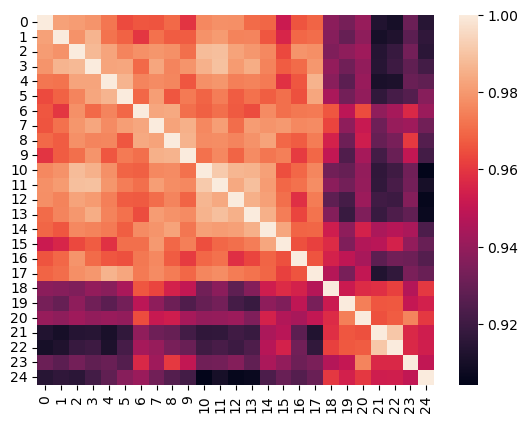

In [13]:
sns.heatmap(normalized_similarity_matrix.squeeze(0))
plt.savefig('semantic_sim.png', dpi=300, bbox_inches='tight', transparent=True)

NameError: name 'df' is not defined

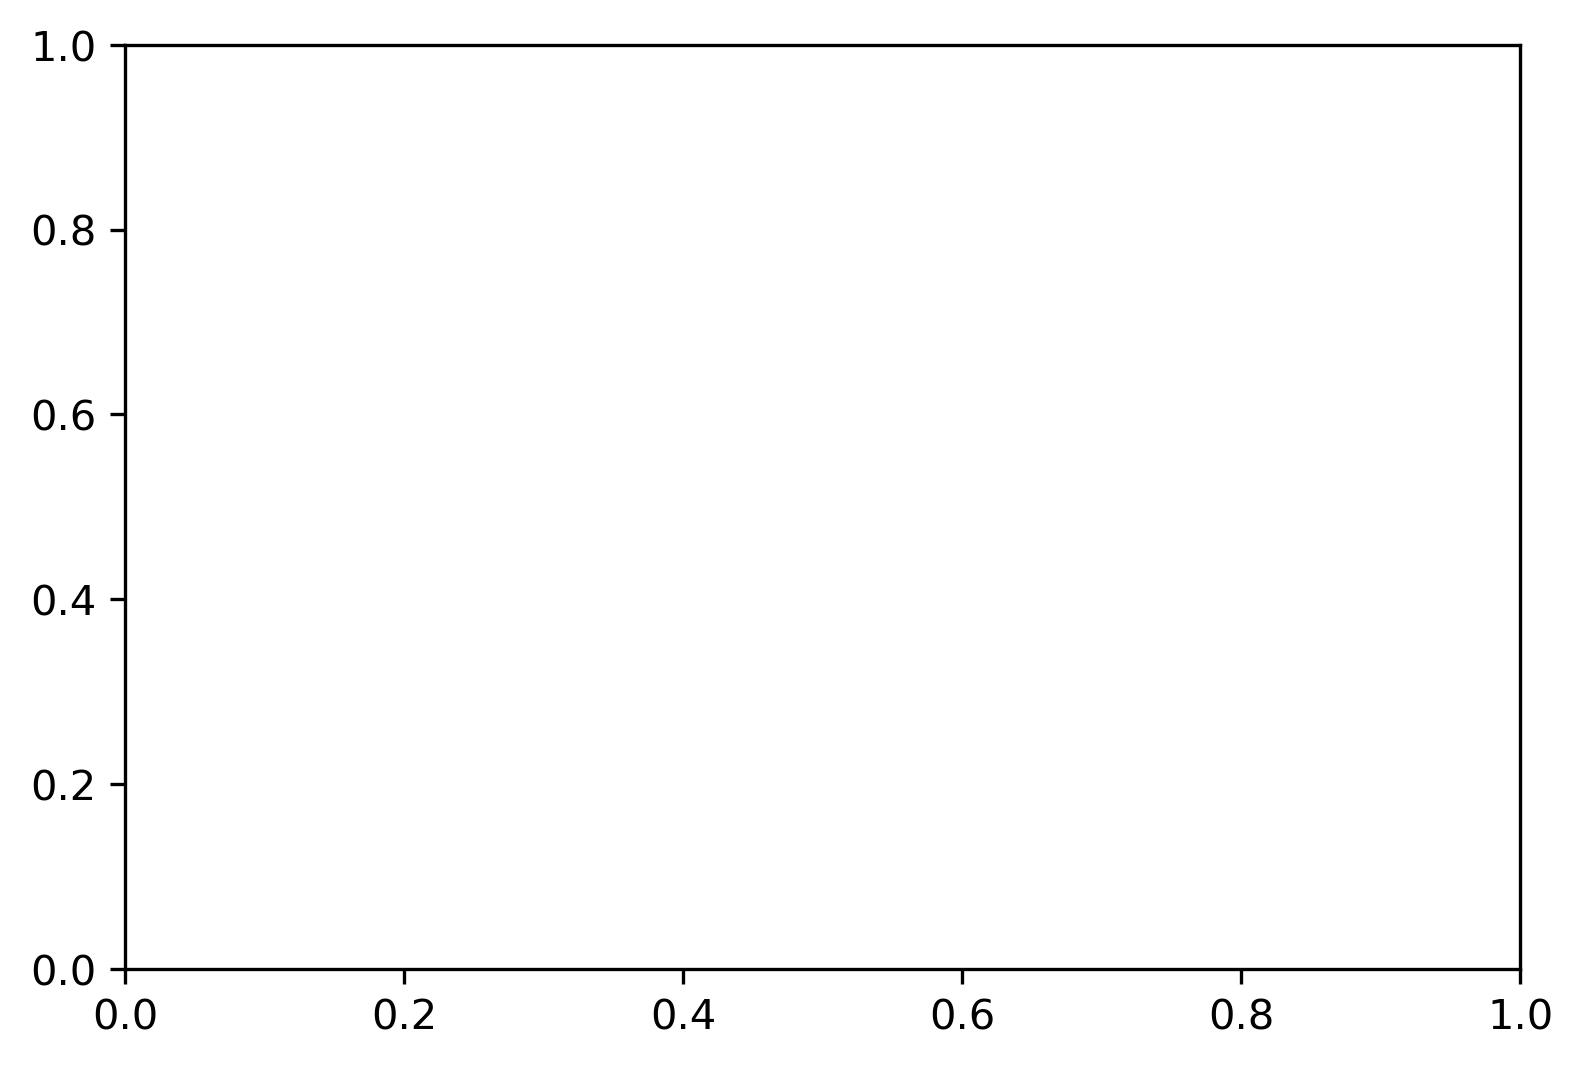

In [8]:
subplot_titles = ['eeg embeddings']

embedding_matrices = [
    sentence_embeddings
]

# Save the subfigures separately
for i, embedding_matrix in enumerate(embedding_matrices):
    fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
    
    reducer = umap.UMAP(n_neighbors=13, metric='cosine', random_state=42)
    embeddings_umap = reducer.fit_transform(embedding_matrix)
    
    df_umap = pd.DataFrame(embeddings_umap, columns=['UMAP Dimension 1', 'UMAP Dimension 2'])
    df_umap['top_category'] = df['top_category']
    
    sns.scatterplot(data=df_umap, x='UMAP Dimension 1', y='UMAP Dimension 2', hue='top_category', ax=ax, s=100)
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend().remove()
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.tight_layout()
    plt.savefig(f'img/embedding_viz_{subplot_titles[i]}.pdf', format='pdf', dpi=300, bbox_inches='tight', transparent=True)
    # plt.close()

# Save the legend separately
fig_legend = plt.figure(figsize=(6, 1), dpi=300)
# legend = fig_legend.legend(handles, labels, loc='center', ncol=len(embedding_matrices), fontsize=16, handlelength=3.5, handletextpad=0.5, columnspacing=0.5)
legend.set_title('Node Category', prop={'weight': 'bold', 'size': 18})
plt.axis('off')
plt.tight_layout()
plt.savefig('img/embedding_legend.pdf', format='pdf', dpi=300, bbox_inches='tight', transparent=True)
# plt.close()

In [42]:
normalized_similarity_matrix.softmax

<function Tensor.softmax>